In [57]:
from models import InferSent
import torch
import numpy as np

In [4]:
V = 2
MODEL_PATH = 'InfersentEmbeddings/encoder/infersent%s.pkl' % V
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': V}
infersent = InferSent(params_model)
infersent.load_state_dict(torch.load(MODEL_PATH))

<All keys matched successfully>

In [5]:
W2V_PATH = 'InfersentEmbeddings/fastText/crawl-300d-2M.vec'
infersent.set_w2v_path(W2V_PATH)

In [8]:
# Load embeddings of K most frequent words
infersent.build_vocab_k_words(K=100000)

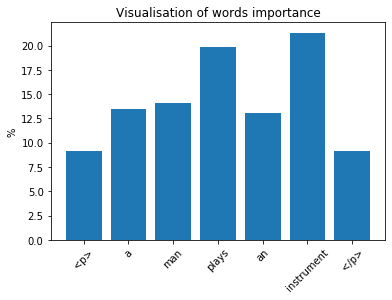

(tensor([[ 0.0075,  0.1760,  0.1548,  ..., -0.0282, -0.0188,  0.0066]],
       grad_fn=<MaxBackward0>), array([[0, 2, 5, ..., 1, 4, 5]]))


In [28]:
vis = infersent.visualize('a man plays an instrument', tokenize=True)
print(vis)

In [24]:
embeddings = infersent.encode(['a man plays an instrument'], tokenize=True)
print(embeddings)

[[ 0.00746889  0.17604084  0.15484244 ... -0.02819919 -0.01880179
   0.00661049]]


In [23]:
vis[0]

tensor([[ 0.0075,  0.1760,  0.1548,  ..., -0.0282, -0.0188,  0.0066]],
       grad_fn=<MaxBackward0>)

In [26]:
vis[1]

array([[0, 2, 5, ..., 1, 4, 5]])

In [25]:
embeddings

array([[ 0.00746889,  0.17604084,  0.15484244, ..., -0.02819919,
        -0.01880179,  0.00661049]], dtype=float32)

In [30]:
sent = infersent.tokenize('a man plays an instrument')
sent

['a', 'man', 'plays', 'an', 'instrument']

In [31]:
sent = [[infersent.bos] + [word for word in sent if word in infersent.word_vec] + [infersent.eos]]
sent

[['<p>', 'a', 'man', 'plays', 'an', 'instrument', '</p>']]

In [32]:
batch = infersent.get_batch(sent)

In [34]:
batch.shape

torch.Size([7, 1, 300])

In [46]:
output = infersent.enc_lstm(batch)[0]

In [47]:
output

tensor([[[ 0.0075, -0.2128, -0.0988,  ..., -0.0872, -0.0712, -0.0473]],

        [[-0.0646, -0.1243, -0.0449,  ..., -0.0282, -0.0566, -0.0368]],

        [[-0.1041,  0.1760,  0.0102,  ..., -0.0300, -0.0671, -0.0445]],

        ...,

        [[-0.1088, -0.0836,  0.0132,  ..., -0.0825, -0.0188, -0.0228]],

        [[-0.1184,  0.0328,  0.1548,  ..., -0.0466, -0.0896,  0.0066]],

        [[-0.0441, -0.1236, -0.0217,  ..., -0.1045, -0.0648, -0.0686]]],
       grad_fn=<CatBackward>)

In [48]:
output, idxs = torch.max(output, 0)

In [49]:
output

tensor([[ 0.0075,  0.1760,  0.1548,  ..., -0.0282, -0.0188,  0.0066]],
       grad_fn=<MaxBackward0>)

In [62]:
idxs

tensor([[0, 2, 5,  ..., 1, 4, 5]])

In [66]:
idxs = idxs.data.cpu().numpy()
idxs

array([[0, 2, 5, ..., 1, 4, 5]])

In [67]:
len(sent[0])

7

In [68]:
argmaxs = [np.sum((idxs == k)) for k in range(len(sent[0]))]
argmaxs

[373, 551, 576, 814, 535, 873, 374]

In [69]:
idxs

array([[0, 2, 5, ..., 1, 4, 5]])

In [70]:
state_dict = torch.load(MODEL_PATH)
state_dict

OrderedDict([('enc_lstm.weight_ih_l0',
              tensor([[-0.0188, -0.0096, -0.0165,  ...,  0.0063,  0.0177,  0.0182],
                      [ 0.0040, -0.0170,  0.0282,  ...,  0.0270, -0.0006, -0.0099],
                      [-0.0333,  0.0013,  0.0235,  ...,  0.0239, -0.0444,  0.0009],
                      ...,
                      [ 0.0068, -0.0130, -0.0136,  ..., -0.0003,  0.0145, -0.0031],
                      [-0.0075, -0.0210,  0.0135,  ...,  0.0149, -0.0059,  0.0018],
                      [-0.0076,  0.0241, -0.0258,  ..., -0.0104,  0.0177,  0.0241]])),
             ('enc_lstm.weight_hh_l0',
              tensor([[ 2.4178e-02, -3.4815e-03, -1.5027e-02,  ...,  2.3643e-02,
                       -4.6200e-03, -1.2944e-02],
                      [ 2.1155e-02, -9.4947e-03,  2.8347e-02,  ..., -1.1898e-02,
                       -1.6273e-02, -1.7331e-02],
                      [ 1.6204e-02, -2.0330e-02, -6.8777e-03,  ..., -8.8209e-03,
                       -1.4847e-02, -1.4684e-